<a href="https://colab.research.google.com/github/Sekarvrlz/UTS-PENAMBANGANDATA-KEL9/blob/main/FIXXXXXPULLLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Copy of Dataset UTS.xlsx - Pembelian.csv to Copy of Dataset UTS.xlsx - Pembelian.csv


In [ ]:
import pandas as pd
import re

file_path = "Copy of Dataset UTS.xlsx - Pembelian.csv"

with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    raw_lines = f.readlines()

lines = []
for line in raw_lines:
    line = line.strip().strip('"').strip("'")
    if not line or "KODE" in line or "TANGGAL" in line or set(line) == {"-"}:
        continue
    lines.append(line)

data = []
current_kode = None
current_produk = None
current_unit = None

for line in lines:
    if re.match(r"^[A-Z]\d+", line):
        parts = re.split(r"\s{2,}", line.strip())
        current_kode = parts[0]
        current_produk = " ".join(parts[1:-1]).strip() if len(parts) > 2 else (parts[1] if len(parts) > 1 else None)
        current_unit = parts[-1] if len(parts) > 1 else None
        continue

    if re.match(r"^\s*\d{2}-\d{2}-\d{2}", line):
        parts = re.split(r"\s{2,}", line.strip())

        tanggal = parts[0]
        no_transaksi = parts[1] if len(parts) > 1 else None

        tipe = None
        if no_transaksi and no_transaksi.startswith("1."):
            tipe = "MASUK"
        elif no_transaksi and no_transaksi.startswith("2."):
            tipe = "KELUAR"

        qty_msk, nilai_msk, qty_klr, nilai_klr = None, None, None, None

        if tipe == "MASUK" and len(parts) >= 4:
            qty_msk = parts[2]
            nilai_msk = parts[3]
        elif tipe == "KELUAR" and len(parts) >= 4:
            qty_klr = parts[2]
            nilai_klr = parts[3]

        data.append([
            current_kode, current_produk, current_unit,
            tanggal, no_transaksi, tipe, qty_msk, nilai_msk, qty_klr, nilai_klr
        ])

df = pd.DataFrame(data, columns=[
    "KODE", "NAMA PRODUK", "UNIT", "TANGGAL", "NO.TRANSAKSI", "TIPE",
    "QTY.MSK", "NILAI MSK", "QTY.KLR", "NILAI KLR"
])

for col in ["QTY.MSK", "NILAI MSK", "QTY.KLR", "NILAI KLR"]:
    df[col] = (
        df[col]
        .astype(str)
        .replace({r'\.': '', ',': '.'}, regex=True)
        .replace({'': None, 'None': None})
    )

print(f"✅ Data berhasil diproses: {len(df)} baris tersimpan!")
df.head(20)


✅ Data berhasil diproses: 138364 baris tersimpan!


,KODE,NAMA PRODUK,UNIT,TANGGAL,NO.TRANSAKSI,TIPE,QTY.MSK,NILAI MSK,QTY.KLR,NILAI KLR
0,A000001,ANATON TAB,STRIP,06-07-21,1.13-210706.0908-003,MASUK,10.00,2520.00,None,None
1,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.1519-097,KELUAR,None,None,1.00,3000.00
2,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1633-013,KELUAR,None,None,1.00,3000.00
3,A000001,ANATON TAB,STRIP,12-07-21,2.13-210712.1807-013,KELUAR,None,None,1.00,3000.00
4,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1855-018,KELUAR,None,None,1.00,3000.00
5,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1925-027,KELUAR,None,None,1.00,3000.00
6,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1957-035,KELUAR,None,None,1.00,3000.00
7,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.0907-023,KELUAR,None,None,2.00,3000.00
8,A000001,ANATON TAB,STRIP,13-07-21,2.11-210713.1102-011,KELUAR,None,None,1.00,3000.00
9,A000001,ANATON TAB,STRIP,13-07-21,2.6-210713.1701-006,KELUAR,None,None,1.00,4000.00


In [ ]:
import pandas as pd
import numpy as np
import re

# --- KODE PARSING ANDA (TIDAK ADA PERUBAHAN) ---

file_path = "Copy of Dataset UTS.xlsx - Pembelian.csv"

with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    raw_lines = f.readlines()

lines = []
for line in raw_lines:
    line = line.strip().strip('"').strip("'")
    if not line or "KODE" in line or "TANGGAL" in line or set(line) == {"-"}:
        continue
    lines.append(line)

data = []
current_kode = None
current_produk = None
current_unit = None

for line in lines:
    if re.match(r"^[A-Z]\d+", line):
        parts = re.split(r"\s{2,}", line.strip())
        current_kode = parts[0]
        current_produk = " ".join(parts[1:-1]).strip() if len(parts) > 2 else (parts[1] if len(parts) > 1 else None)
        current_unit = parts[-1] if len(parts) > 1 else None
        continue

    if re.match(r"^\s*\d{2}-\d{2}-\d{2}", line):
        parts = re.split(r"\s{2,}", line.strip())
        tanggal = parts[0]
        no_transaksi = parts[1] if len(parts) > 1 else None
        tipe = None
        if no_transaksi and no_transaksi.startswith("1."):
            tipe = "MASUK"
        elif no_transaksi and no_transaksi.startswith("2."):
            tipe = "KELUAR"
        qty_msk, nilai_msk, qty_klr, nilai_klr = None, None, None, None
        if tipe == "MASUK" and len(parts) >= 4:
            qty_msk = parts[2]
            nilai_msk = parts[3]
        elif tipe == "KELUAR" and len(parts) >= 4:
            qty_klr = parts[2]
            nilai_klr = parts[3]
        data.append([
            current_kode, current_produk, current_unit,
            tanggal, no_transaksi, tipe, qty_msk, nilai_msk, qty_klr, nilai_klr
        ])

df = pd.DataFrame(data, columns=[
    "KODE", "NAMA PRODUK", "UNIT", "TANGGAL", "NO.TRANSAKSI", "TIPE",
    "QTY.MSK", "NILAI MSK", "QTY.KLR", "NILAI KLR"
])

# --- PEMBERSIHAN KOLOM ANGKA ---

for col in ["QTY.MSK", "NILAI MSK", "QTY.KLR", "NILAI KLR"]:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"✅ Data berhasil diproses: {len(df)} baris tersimpan!")
print("-" * 50)


# --- LANGKAH TERAKHIR: MEMBUAT SATU KOLOM HARGA SATUAN GABUNGAN ---

# 1. Hitung harga satuan beli dan jual secara terpisah
harga_beli = df['NILAI MSK'] / df['QTY.MSK']
harga_jual = df['NILAI KLR'] / df['QTY.KLR']

# 2. Gabungkan keduanya menjadi satu kolom 'Harga Satuan'
df['Harga Satuan'] = harga_beli.fillna(harga_jual)


# --- HASIL AKHIR ---
print("\n🎉 HASIL AKHIR: Menampilkan SEMUA Kolom Termasuk Harga Satuan")
# Cukup panggil df.head() untuk menampilkan semua kolom
print(df.head(10))

✅ Data berhasil diproses: 138364 baris tersimpan!
--------------------------------------------------

🎉 HASIL AKHIR: Menampilkan SEMUA Kolom Termasuk Harga Satuan
      KODE NAMA PRODUK   UNIT   TANGGAL          NO.TRANSAKSI    TIPE  \
0  A000001  ANATON TAB  STRIP  06-07-21  1.13-210706.0908-003   MASUK   
1  A000001  ANATON TAB  STRIP  12-07-21   2.6-210712.1519-097  KELUAR   
2  A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1633-013  KELUAR   
3  A000001  ANATON TAB  STRIP  12-07-21  2.13-210712.1807-013  KELUAR   
4  A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1855-018  KELUAR   
5  A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1925-027  KELUAR   
6  A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1957-035  KELUAR   
7  A000001  ANATON TAB  STRIP  12-07-21   2.6-210712.0907-023  KELUAR   
8  A000001  ANATON TAB  STRIP  13-07-21  2.11-210713.1102-011  KELUAR   
9  A000001  ANATON TAB  STRIP  13-07-21   2.6-210713.1701-006  KELUAR   

   QTY.MSK  NILAI MSK  QTY.KLR  N

In [ ]:
# Menampilkan jumlah data kosong (missing value) untuk setiap kolom di tabel akhir
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
KODE                 0
NAMA PRODUK          0
UNIT                 0
TANGGAL              0
NO.TRANSAKSI         0
TIPE              2505
QTY.MSK         123016
NILAI MSK       123016
QTY.KLR          17853
NILAI KLR        17853
Harga Satuan      2505
dtype: int64


📊 Visualisasi SEBELUM Missing Values Diperbaiki:


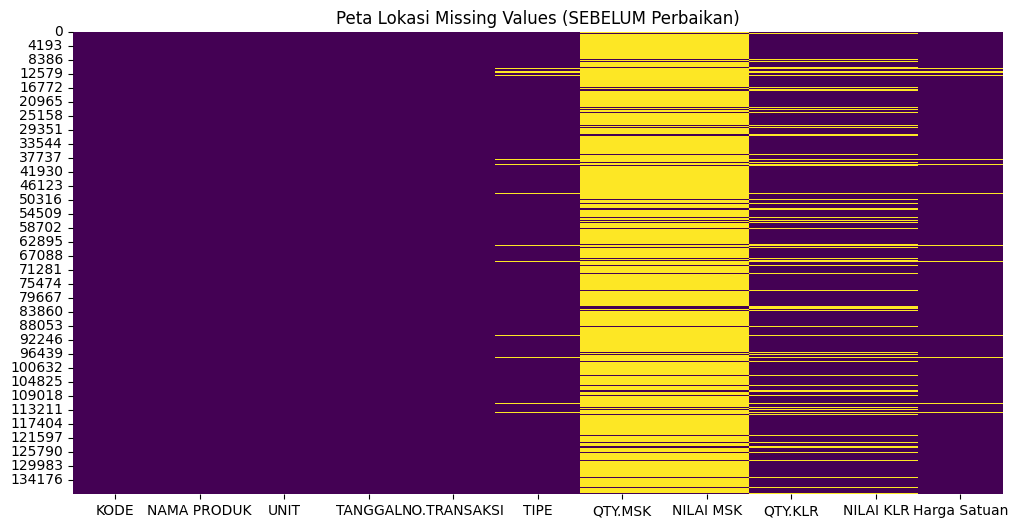

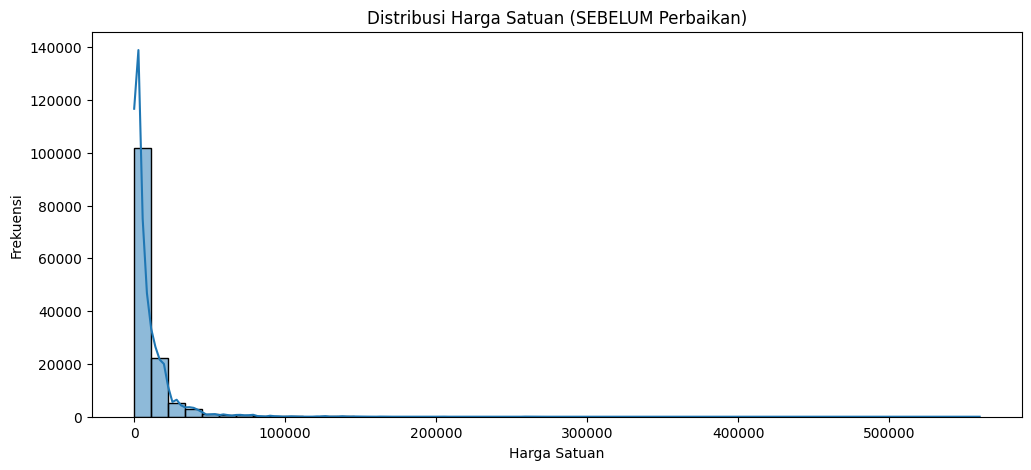

--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- LANGKAH 1: VISUALISASI SEBELUM PERBAIKAN ---

print("📊 Visualisasi SEBELUM Missing Values Diperbaiki:")

# 1. Heatmap untuk melihat lokasi nilai kosong
# Garis kuning cerah menunjukkan data yang kosong (NaN)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Lokasi Missing Values (SEBELUM Perbaikan)')
plt.show()

# 2. Histogram untuk melihat distribusi Harga Satuan
# .dropna() digunakan agar nilai kosong tidak ikut digambar
plt.figure(figsize=(12, 5))
sns.histplot(df['Harga Satuan'].dropna(), kde=True, bins=50)
plt.title('Distribusi Harga Satuan (SEBELUM Perbaikan)')
plt.xlabel('Harga Satuan')
plt.ylabel('Frekuensi')
plt.show()
print("-" * 50)

In [ ]:
# --- TAHAP IMPUTASI ---

# 1. Imputasi nilai QTY dan NILAI yang kosong dengan angka 0
kolom_kuantitas = ["QTY.MSK", "NILAI MSK", "QTY.KLR", "NILAI KLR"]
df[kolom_kuantitas] = df[kolom_kuantitas].fillna(0)
print("✅ Nilai QTY & NILAI yang kosong telah diisi dengan 0.")

# 2. Imputasi nilai TIPE yang kosong dengan label 'TIDAK DIKETAHUI'
df['TIPE'] = df['TIPE'].fillna('TIDAK DIKETAHUI')
print("✅ Nilai TIPE yang kosong telah dilabeli 'TIDAK DIKETAHUI'.")

# 3. Hitung ulang 'Harga Satuan' setelah imputasi QTY & NILAI
harga_beli = df['NILAI MSK'] / df['QTY.MSK']
harga_jual = df['NILAI KLR'] / df['QTY.KLR']
# Ganti nilai 'inf' (hasil pembagian dengan 0) menjadi 0
harga_beli.replace([np.inf, -np.inf], 0, inplace=True)
harga_jual.replace([np.inf, -np.inf], 0, inplace=True)

# Gabungkan lagi dan isi sisa kekosongan (dari TIPE 'TIDAK DIKETAHUI') dengan 0
df['Harga Satuan'] = harga_beli.fillna(harga_jual)
df['Harga Satuan'] = df['Harga Satuan'].fillna(0)
print("✅ Kolom 'Harga Satuan' telah dihitung ulang dan diisi.")
print("-" * 50)

✅ Nilai QTY & NILAI yang kosong telah diisi dengan 0.
✅ Nilai TIPE yang kosong telah dilabeli 'TIDAK DIKETAHUI'.
✅ Kolom 'Harga Satuan' telah dihitung ulang dan diisi.
--------------------------------------------------


In [ ]:
# --- PENGECEKAN AKHIR ---
print("🔍 Pengecekan Missing Values SETELAH semua diperbaiki:")
print(df.isnull().sum())
print("\n(Semua kolom sekarang seharusnya menunjukkan 0 missing values)")

🔍 Pengecekan Missing Values SETELAH semua diperbaiki:
KODE            0
NAMA PRODUK     0
UNIT            0
TANGGAL         0
NO.TRANSAKSI    0
TIPE            0
QTY.MSK         0
NILAI MSK       0
QTY.KLR         0
NILAI KLR       0
Harga Satuan    0
dtype: int64

(Semua kolom sekarang seharusnya menunjukkan 0 missing values)


📊 Visualisasi SESUDAH Missing Values Diperbaiki:


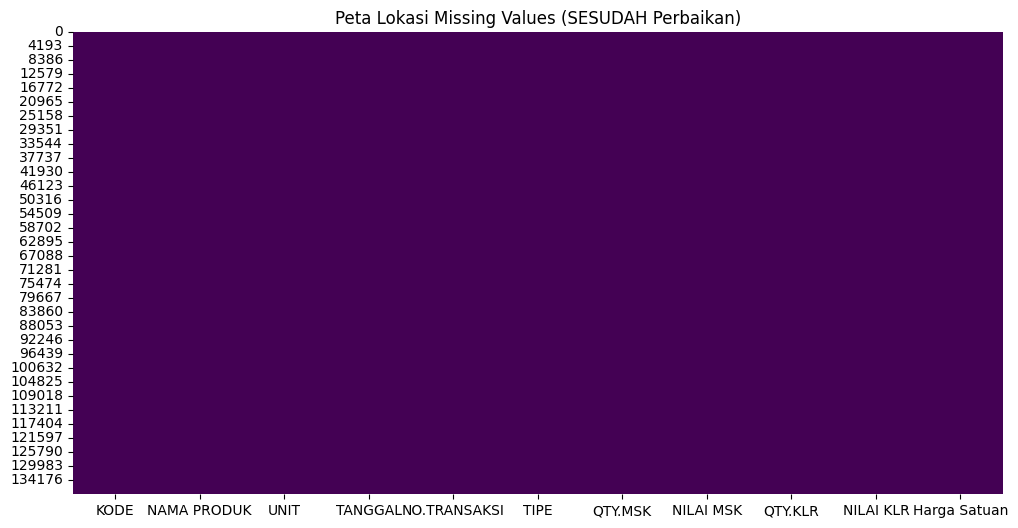

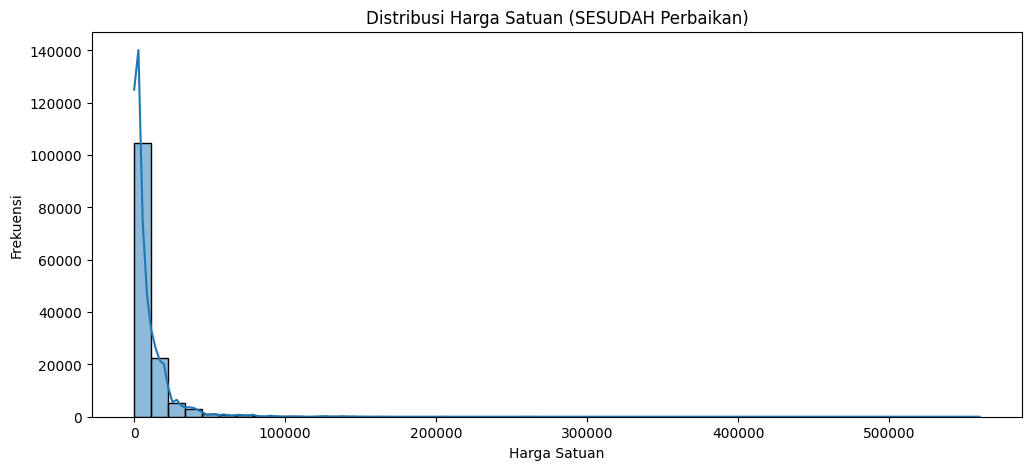

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- VISUALISASI SESUDAH PERBAIKAN ---

print("📊 Visualisasi SESUDAH Missing Values Diperbaiki:")

# 1. Heatmap untuk konfirmasi
#    Grafik ini seharusnya menjadi satu blok warna solid tanpa garis kuning.
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Lokasi Missing Values (SESUDAH Perbaikan)')
plt.show()

# 2. Histogram untuk melihat perubahan distribusi
#    Anda akan melihat lonjakan (spike) yang sangat tinggi di angka 0.
plt.figure(figsize=(12, 5))
sns.histplot(df['Harga Satuan'], kde=True, bins=50)
plt.title('Distribusi Harga Satuan (SESUDAH Perbaikan)')
plt.xlabel('Harga Satuan')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- LANGKAH 1: FUNGSI UNTUK MEMBERSIHKAN DATA ---

def parse_pembelian(file_path):
    # Menggunakan fungsi parser yang sudah kita buat sebelumnya
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        lines = f.readlines()
    data = []
    current_product = {}
    for line in lines:
        line_clean = line.strip().strip('"').strip("'")
        if not line_clean or '-----' in line_clean or 'TANGGAL' in line_clean or 'KODE' in line_clean:
            continue
        parts = line_clean.split()
        if len(parts) > 2 and (parts[1].startswith('1.') or parts[1].startswith('2.')):
            if not current_product: continue
            try:
                tanggal, no_transaksi = parts[0], parts[1]
                qty_msk, nilai_msk, qty_klr, nilai_klr = None, None, None, None
                if no_transaksi.startswith('1.'):
                    qty_msk, nilai_msk = parts[2], parts[3]
                elif no_transaksi.startswith('2.'):
                    qty_klr, nilai_klr = parts[2], parts[3]
                def to_float(s):
                    if s is None: return None
                    return float(s.replace('.', '').replace(',', '.'))
                row = current_product.copy()
                row.update({
                    'TANGGAL': tanggal, 'NO.TRANSAKSI': no_transaksi,
                    'QTY.MSK': to_float(qty_msk), 'QTY.KLR': to_float(qty_klr)
                })
                data.append(row)
            except (ValueError, IndexError): continue
        else:
            if len(parts) > 1:
                current_product = {'KODE': parts[0], 'NAMA PRODUK': ' '.join(parts[1:-1]).strip(), 'UNIT': parts[-1]}
    return pd.DataFrame(data)

# --- FUNGSI PARSE_STOK YANG TELAH DIPERBAIKI ---
def parse_stok(file_path):
    """
    Parser baru yang lebih andal untuk file Stok.csv.
    Logika ini mencari kolom kuantitas terlebih dahulu untuk menghindari kesalahan potong.
    """
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        lines = f.readlines()[2:] # Lewati 2 baris header
    data = []
    for line in lines:
        line_clean = line.strip().strip('"').strip("'")
        if not line_clean: continue

        parts = line_clean.split()
        if len(parts) < 3: continue # Lewati baris yang tidak lengkap

        try:
            # Cari kolom kuantitas dari kanan ke kiri (biasanya kedua dari belakang)
            qty_stok_str = parts[-2]
            qty_stok = float(qty_stok_str.replace(',', '.'))

            kode = parts[0]
            # Sisa bagian di antara kode dan kuantitas adalah nama produk & lokasi
            # Untuk model ini, kita hanya butuh Kode dan Stok, jadi bisa disederhanakan
            data.append({'KODE': kode, 'QTY.STOK': qty_stok})
        except (ValueError, IndexError):
            # Lewati baris jika tidak bisa menemukan format angka yang benar
            continue

    return pd.DataFrame(data)

In [ ]:
# --- LANGKAH 2: MEMPROSES DAN MENGGABUNGKAN DATA ---

# Proses data penjualan (keluar)
df_pembelian = parse_pembelian( 'Copy of Dataset UTS.xlsx - Pembelian.csv')
df_penjualan = df_pembelian[df_pembelian['QTY.KLR'].notna()].copy()
permintaan_produk = df_penjualan.groupby('KODE')['QTY.KLR'].sum().reset_index()
permintaan_produk.rename(columns={'QTY.KLR': 'TOTAL_TERJUAL'}, inplace=True)

# Proses data stok awal dengan parser baru
df_stok = parse_stok('Copy of Dataset UTS.xlsx - Stok.csv')

# Gabungkan data stok dan data penjualan menjadi satu tabel
df_model = pd.merge(df_stok, permintaan_produk, on='KODE', how='inner')
print("✅ Data stok dan penjualan berhasil digabungkan.")
print("Contoh data yang akan digunakan untuk model:")
print(df_model.head())
print("-" * 50)

✅ Data stok dan penjualan berhasil digabungkan.
Contoh data yang akan digunakan untuk model:
      KODE  QTY.STOK  TOTAL_TERJUAL
0  A000001      12.0           18.0
1   A00001       2.0           19.0
2  A000012       2.0           16.0
3  A000014       7.0           25.0
4  A000016      40.0           39.0
--------------------------------------------------


In [ ]:
# --- LANGKAH 3: MEMBUAT TARGET KLASIFIKASI (PERMINTAAN TINGGI vs RENDAH) ---

ambang_batas = df_model['TOTAL_TERJUAL'].median()
print(f"Ambang batas permintaan (median penjualan): {ambang_batas:.2f} unit")
df_model['PERMINTAAN'] = np.where(df_model['TOTAL_TERJUAL'] >= ambang_batas, 'Tinggi', 'Rendah')
print("\nDistribusi kelas permintaan:")
print(df_model['PERMINTAAN'].value_counts())
print("-" * 50)

Ambang batas permintaan (median penjualan): 14.00 unit

Distribusi kelas permintaan:
PERMINTAAN
Tinggi    710
Rendah    669
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
# --- LANGKAH 4: MEMBUAT DAN MELATIH MODEL MACHINE LEARNING ---

X = df_model[['QTY.STOK']] # Fitur
y = df_model['PERMINTAAN']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
print("✅ Model Decision Tree berhasil dilatih!")
print("-" * 50)

Data dibagi menjadi 1103 data latih dan 276 data uji.
✅ Model Decision Tree berhasil dilatih!
--------------------------------------------------


In [ ]:
# --- LANGKAH 5: EVALUASI KINERJA MODEL ---

y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f"📊 Akurasi Model: {akurasi:.2%}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
stok_baru = [[150]]
prediksi_baru = model.predict(stok_baru)
print(f"\nPrediksi untuk produk dengan stok {stok_baru[0][0]}: Permintaan akan tergolong '{prediksi_baru[0]}'")

📊 Akurasi Model: 69.57%

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Rendah       0.64      0.79      0.70       127
      Tinggi       0.77      0.62      0.69       149

    accuracy                           0.70       276
   macro avg       0.71      0.70      0.70       276
weighted avg       0.71      0.70      0.69       276


Prediksi untuk produk dengan stok 150: Permintaan akan tergolong 'Tinggi'


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


📊 Visualisasi 1: Jumlah Produk per Kategori Permintaan


/tmp/ipython-input-3082284823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PERMINTAAN', data=df_model, palette='viridis', order=['Rendah', 'Tinggi'])


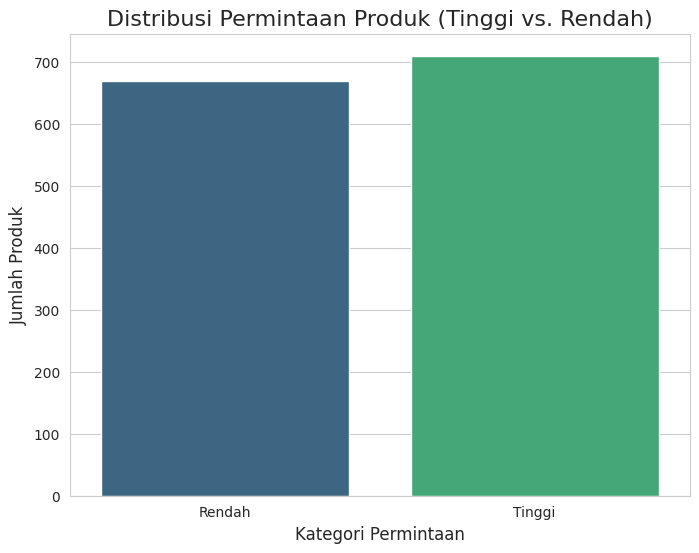

--------------------------------------------------

📊 Visualisasi 2: Perbandingan Stok Awal antara Kategori Permintaan


/tmp/ipython-input-3082284823.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PERMINTAAN', y='QTY.STOK', data=df_model, palette='magma', order=['Rendah', 'Tinggi'])


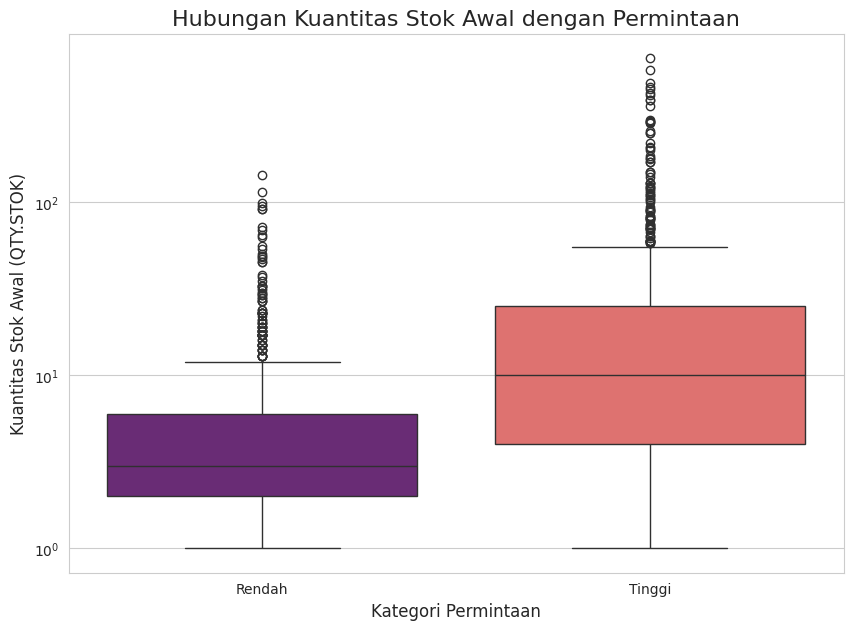


Dari Box Plot, kita bisa melihat bahwa produk dengan permintaan 'Tinggi' cenderung memiliki stok awal yang lebih beragam dan lebih tinggi dibandingkan produk dengan permintaan 'Rendah'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set_style("whitegrid")

# --- Visualisasi 1: Distribusi Kelas Permintaan ---
print("📊 Visualisasi 1: Jumlah Produk per Kategori Permintaan")

plt.figure(figsize=(8, 6))
sns.countplot(x='PERMINTAAN', data=df_model, palette='viridis', order=['Rendah', 'Tinggi'])
plt.title('Distribusi Permintaan Produk (Tinggi vs. Rendah)', fontsize=16)
plt.xlabel('Kategori Permintaan', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.show()

print("-" * 50)

# --- Visualisasi 2: Hubungan Stok Awal dengan Permintaan ---
print("\n📊 Visualisasi 2: Perbandingan Stok Awal antara Kategori Permintaan")

plt.figure(figsize=(10, 7))
sns.boxplot(x='PERMINTAAN', y='QTY.STOK', data=df_model, palette='magma', order=['Rendah', 'Tinggi'])
plt.title('Hubungan Kuantitas Stok Awal dengan Permintaan', fontsize=16)
plt.xlabel('Kategori Permintaan', fontsize=12)
plt.ylabel('Kuantitas Stok Awal (QTY.STOK)', fontsize=12)
plt.yscale('log') # Menggunakan skala logaritmik agar outlier tidak mendominasi visual
plt.show()

print("\nDari Box Plot, kita bisa melihat bahwa produk dengan permintaan 'Tinggi' cenderung memiliki stok awal yang lebih beragam dan lebih tinggi dibandingkan produk dengan permintaan 'Rendah'.")

In [ ]:
from google.colab import files

# --- LANGKAH 1: DOWNLOAD HASIL PEMROSESAN MISSING VALUE ---

# Nama file yang akan di-download
nama_file_imputasi = 'hasil_pemrosesan_missing_value.csv'

# Menyimpan DataFrame 'df' yang sudah diimputasi ke dalam file CSV
df.to_csv(nama_file_imputasi, index=False)

print(f"✅ Tabel '{nama_file_imputasi}' siap di-download.")
# Perintah ini akan memicu browser untuk men-download file
files.download(nama_file_imputasi)

print("-" * 50)


# --- LANGKAH 2: DOWNLOAD DATA YANG DIGUNAKAN UNTUK MODEL ML ---

# Nama file yang akan di-download
nama_file_model = 'hasil_untuk_model_ml.csv'

# Menyimpan DataFrame 'df_model' ke dalam file CSV
df_model.to_csv(nama_file_model, index=False)

print(f"✅ Tabel '{nama_file_model}' siap di-download.")
# Perintah ini akan memicu browser untuk men-download file
files.download(nama_file_model)

✅ Tabel 'hasil_pemrosesan_missing_value.csv' siap di-download.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
✅ Tabel 'hasil_untuk_model_ml.csv' siap di-download.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>